# K Nearest Neighbors

K Nearest Neighbors (KNN) is an algorithm for classifcation and regression problems. It stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K-NN algorithm.

Implementing the KNN algorithm:

We have a dataset that contains description of flags that will predict the religion of that flag's country. We have image of different flags that looks similar to the dataset flags. Our KNN model will find the similar features of the new data set to fit the flags description and based on the similar features it will put it into a religion: Catholic, Hindu, Muslim and other Christianity.  

Steps to implement the K-NN algorithm:
-Data pre-processing step
-Fitting the K-NN algorithm to the Training set
-Predicting the test result
-Test accuracy of the result
-Visualizing the test set result

In [172]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [173]:
flag = pd.read_csv("flags.csv", names=['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colors', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright'])
flag.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


-Trying to come out with the religion: 0-6

In [174]:
flag = pd.get_dummies(flag)

In [175]:
X = flag.drop(columns='religion')
y = flag.religion

Drop the 'output: religion' from the input set since that will become our y values, dependent 

# Testing and Training Data

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [177]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

We are trying to measure distance from each flag data set.

In [178]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Test K Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.367
k: 3, Train/Test Score: 0.648/0.408
k: 5, Train/Test Score: 0.538/0.490
k: 7, Train/Test Score: 0.517/0.449
k: 9, Train/Test Score: 0.538/0.408
k: 11, Train/Test Score: 0.545/0.429
k: 13, Train/Test Score: 0.517/0.449
k: 15, Train/Test Score: 0.469/0.429
k: 17, Train/Test Score: 0.455/0.449
k: 19, Train/Test Score: 0.441/0.388


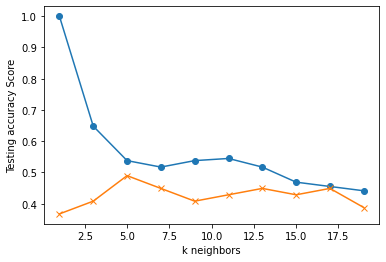

In [179]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Blue: Train score 
Yellow: Test score

We look for a spot where the line stablizes, and use that K.

In [180]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.408


# Predication

In [182]:
model.predict(X_test)

array([0, 0, 5, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 5, 0,
       6, 0, 1, 2, 1, 5, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 6, 2, 1, 1, 0, 0,
       1, 1, 2, 1, 0], dtype=int64)

In [183]:
y_test.values

array([6, 0, 2, 6, 1, 1, 1, 1, 0, 4, 6, 5, 2, 0, 1, 2, 1, 1, 5, 1, 1, 0,
       5, 6, 1, 6, 1, 5, 1, 0, 5, 4, 1, 1, 1, 5, 1, 3, 2, 5, 0, 1, 2, 0,
       1, 2, 5, 1, 0], dtype=int64)

Anaylsis: 